In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from matplotlib.patches import Polygon

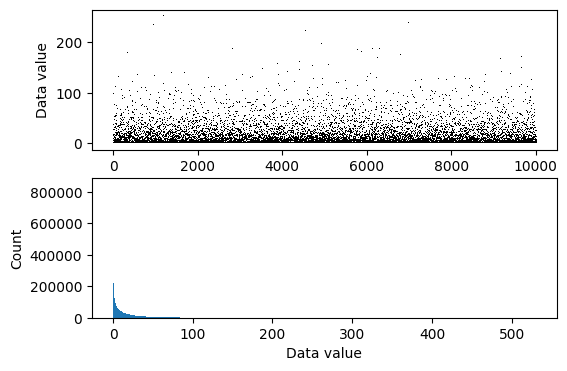

In [2]:
## simulate data

popN = int(1e7) # lots and LOTS of data!

# the data (note: non-normal)
population = (4*np.random.randn(popN))**2

popMean = np.mean(population)

# Let's see it
fig,ax =plt.subplots(2,1,figsize=(6,4))

# only plot every 1000th sample
ax[0].plot(population[::1000],'k,')
ax[0].set_xlabel('Data index')
ax[0].set_ylabel('Data value')

ax[1].hist(population,bins='fd')
ax[1].set_ylabel('Count')
ax[1].set_xlabel('Data value')
plt.show()

In [183]:
## draw a random sample

# parameters
samplesize= 40
confidence = 95 

# compute sample mean
randSamples = np.random.randint(0,popN,samplesize)
sampledata = population[randSamples]
samplemean = np.mean(sampledata)
samplestd =np.std(sampledata)

### now for bootstrapping
numBoots = 1000
bootmeans = np.zeros(numBoots)

# resample with replacement
for booti in range(numBoots):
    bootmeans[booti] = np.mean(np.random.choice(sampledata,samplesize))

# find confidence intervals
confint = [0,0] # initialize
confint[0] = np.percentile(bootmeans,(100-confidence)/2) #2.5%
confint[1] = np.percentile(bootmeans,100-(100-confidence)/2) #97.5% 


In [182]:
np.random.choice([1,2,3,4,5],5) # 복원 추출을 하는것을 볼 수 있음

array([3, 2, 5, 5, 5])

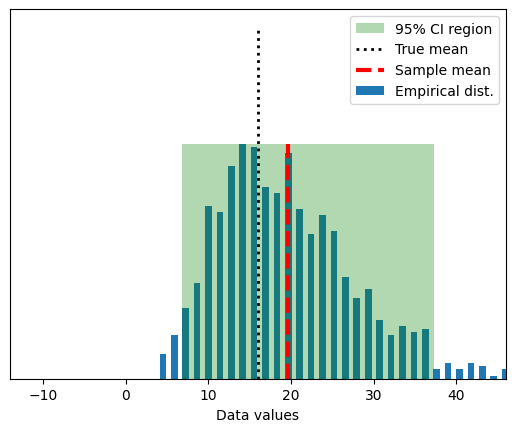

In [175]:
## graph everything
fig,ax = plt.subplots(1,1)

# start with histogram of resampled means
y,x = np.histogram(bootmeans,40)
y = y/max(y)
x = (x[:-1]+x[1:])/2
ax.bar(x,y)

y = np. array([[confint[0],0],[confint[1],0],[confint[1],1],[confint[0],1]])
p = Polygon(y,facecolor='g',alpha=.3)
ax.add_patch(p)

# now add the lines
ax.plot([popMean,popMean],[0,1.5],'k:',linewidth=2)
ax.plot([samplemean,samplemean],[0,1],'r--',linewidth=3)
ax.set_xlim([popMean-30,popMean+30])
ax.set_yticks([])
ax.set_xlabel('Data values')
ax.legend(('%g%% CI region'%confidence,'True mean','Sample mean','Empirical dist.'))
plt.show()

In [107]:
## compare against the analytic confidence interval

# compute confidence intervals
citmp = (1-confidence/100)/2
confint2 = samplemean + stats.t.ppf([citmp,1-citmp],samplesize-1) * samplestd/np.sqrt(samplesize)

print('Empirical: %g - %g'%(confint[0],confint[1]))
print('Analytic: %g - %g'%(confint2[0],confint2[1]))

Empirical: 7.76391 - 19.111
Analytic: 6.74394 - 18.7836


In [184]:

## draw a random sample

# parameters
samplesize= 40
confidence = 95 

# compute sample mean
randSamples = np.random.randint(0,popN,samplesize)
sampledata = population[randSamples]
samplestd =np.std(sampledata)

### now for bootstrapping
numBoots = 1000
bootstds = np.zeros(numBoots)

# resample with replacement
for booti in range(numBoots):
    bootstds[booti] = np.std(np.random.choice(sampledata,samplesize))

# find confidence intervals
confint = [0,0] # initialize
confint[0] = np.percentile(bootstds,(100-confidence)/2) #2.5%
confint[1] = np.percentile(bootstds,100-(100-confidence)/2) #97.5% 


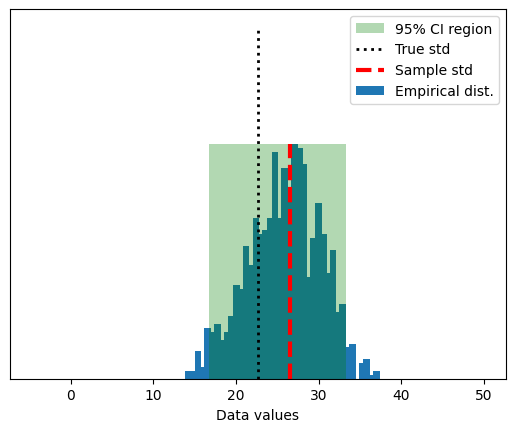

In [185]:
## graph everything
fig,ax = plt.subplots(1,1)
popstd = np.std(population)

# start with histogram of resampled means
y,x = np.histogram(bootstds,40)
y = y/max(y)
x = (x[:-1]+x[1:])/2
ax.bar(x,y)

y = np. array([[confint[0],0],[confint[1],0],[confint[1],1],[confint[0],1]])
p = Polygon(y,facecolor='g',alpha=.3)
ax.add_patch(p)

# now add the lines
ax.plot([popstd,popstd],[0,1.5],'k:',linewidth=2)
ax.plot([samplestd,samplestd],[0,1],'r--',linewidth=3)
ax.set_xlim([popstd-30,popstd+30])
ax.set_yticks([])
ax.set_xlabel('Data values')
ax.legend(('%g%% CI region'%confidence,'True std','Sample std','Empirical dist.'))
plt.show()